<a href="https://colab.research.google.com/github/Juliodominguezcalderon/Talento_tech/blob/main/2_M%C3%A9todo_Monte_Carlo_y_Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Métodos de Monte-Carlo**

In [148]:
#importamos las librerías a utilizar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import yfinance as yf
import pandas_datareader as dr
from datetime import date, datetime, timedelta
import random

In [149]:
np.random.seed(1984)#Fijamos la semilla con valor 1984
#Aseguramos que las gráficas se muestren del notebook
%matplotlib inline
plt.style.use("ggplot") #Utilizamos el estilo gg para las gráficas

In [150]:
# Utilizando random para genera números aleatorios.
import random
random.seed(1984) # semilla para replicar la aleatoriedad

In [151]:
random.random() # primer llamado a random

0.36352835585530807

In [51]:
random.random() # segundo llamado a random

0.38578540884489343

In [152]:
n_random = 5 # definimos la cantidad de números aleatorios a generar
for i in range(n_random):
    print(random.random())

0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219


In [153]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984)
for i in range(5):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037


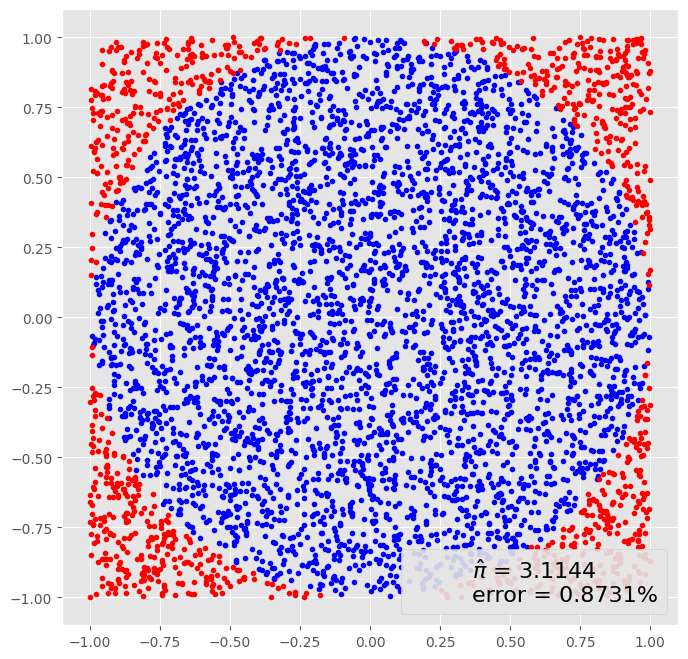

In [154]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.
#ENCUENTRA UNA APROXIMACIÓN A PI
#Experimentos = 5.000
def mc_pi_aprox(N=5000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

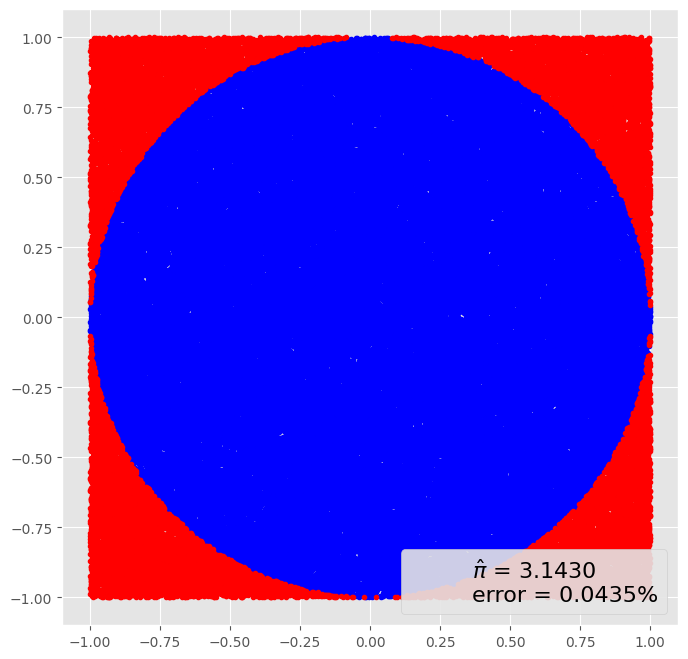

In [155]:
# con 100.000 experimentos
mc_pi_aprox(N=100000)

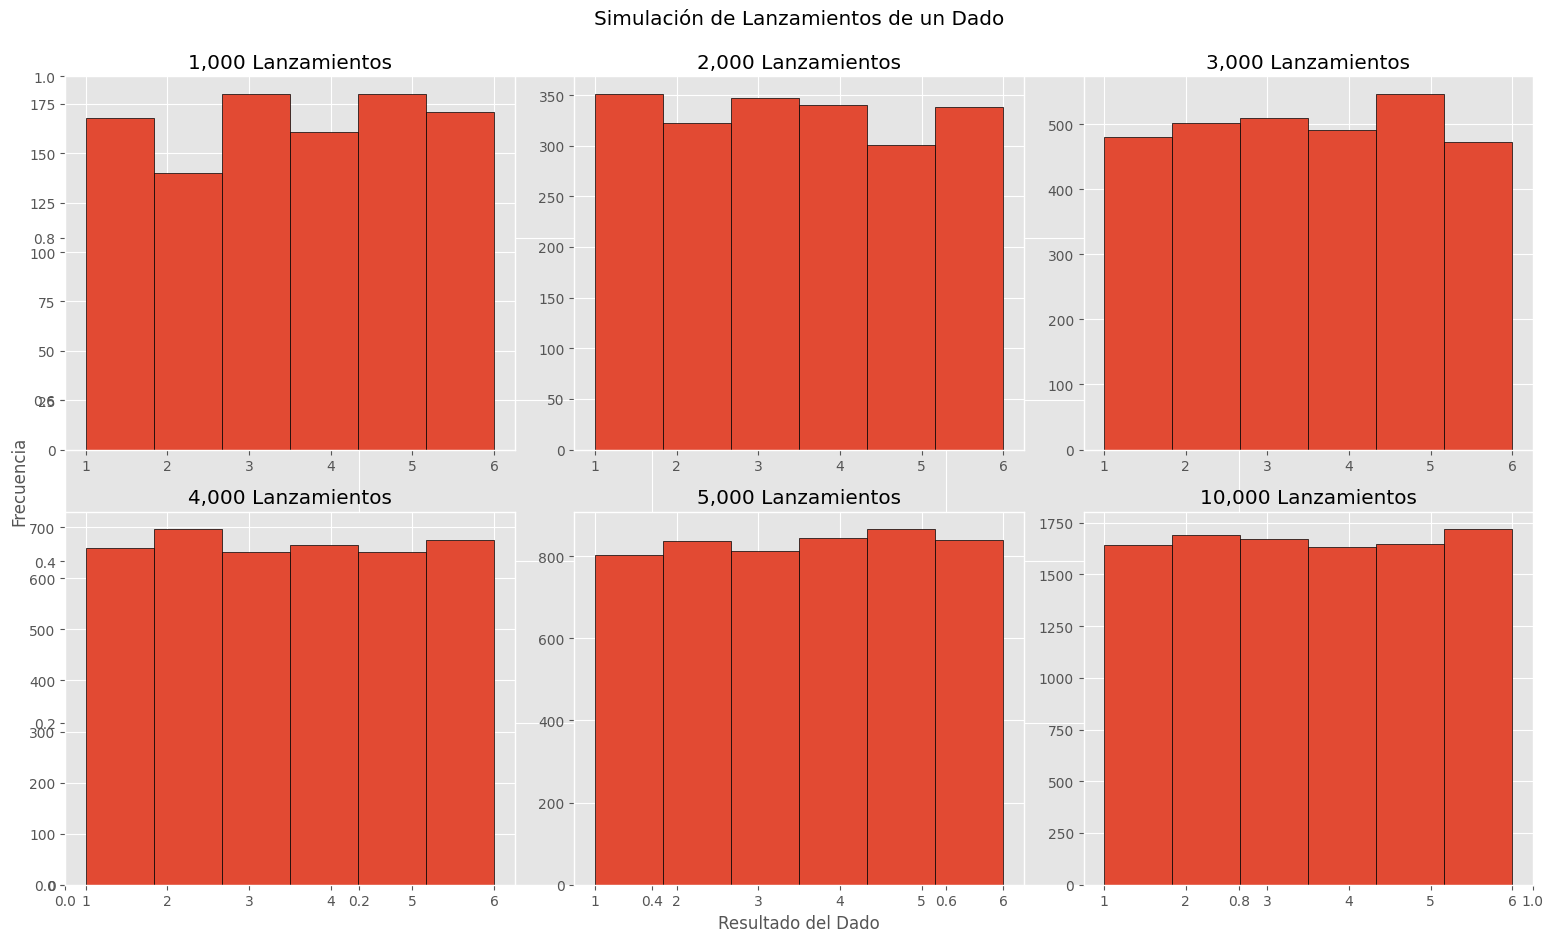

In [156]:
# Simulación de lanzamiento de un dado 1,000 veces
resultados_1000 = np.random.randint(1, 7, 1000)
resultados_2000 = np.random.randint(1, 7, 2000)
resultados_3000 = np.random.randint(1, 7, 3000)
resultados_4000 = np.random.randint(1, 7, 4000)
resultados_5000 = np.random.randint(1, 7, 5000)
resultados_10000 = np.random.randint(1, 7, 10000)

# Visualización de resultados para diferentes cantidades de lanzamientos
plt.figure(figsize=(16, 10))
plt.title('Simulación de Lanzamientos de un Dado\n\n')
plt.xlabel('Resultado del Dado')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 1)
plt.hist(resultados_1000, bins=6, edgecolor='black')
plt.title('1,000 Lanzamientos')

plt.subplot(2, 3, 2)
plt.hist(resultados_2000, bins=6, edgecolor='black')
plt.title('2,000 Lanzamientos')

plt.subplot(2, 3, 3)
plt.hist(resultados_3000, bins=6, edgecolor='black')
plt.title('3,000 Lanzamientos')

plt.subplot(2, 3, 4)
plt.hist(resultados_4000, bins=6, edgecolor='black')
plt.title('4,000 Lanzamientos')

plt.subplot(2, 3, 5)
plt.hist(resultados_5000, bins=6, edgecolor='black')
plt.title('5,000 Lanzamientos')

plt.subplot(2, 3, 6)
plt.hist(resultados_10000, bins=6, edgecolor='black')
plt.title('10,000 Lanzamientos')

plt.tight_layout()
plt.show()

In [157]:
# Descargar datos de una acción
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [158]:
data.columns = data.columns.get_level_values('Price')
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date']).dt.date # Nos quedamos con el formato año-mes-día

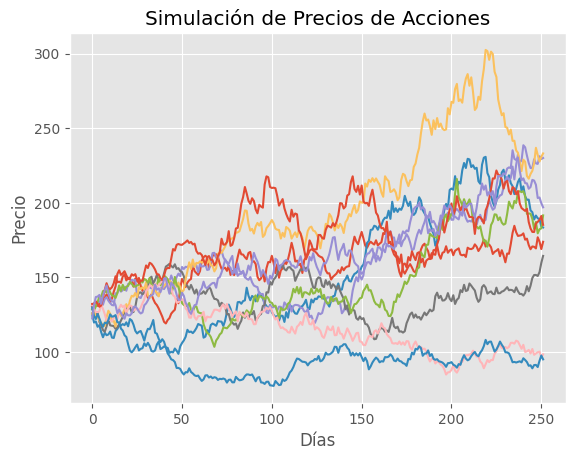

In [159]:
#Simular trayectorias de precios usando Monte Carlo
precios = data['Adj Close'].values
S0 = data['Adj Close'].iloc[-1]  # Precio inicial
T = 252  # Días habiles en un año
mu = np.mean(np.diff(np.log(precios)))  # Rentabilidad media
sigma = np.std(np.diff(np.log(precios)))  # Volatilidad

n_simulaciones = 1000  # Número de simulaciones
trayectorias = np.zeros((T, n_simulaciones))

for i in range(n_simulaciones):
    trayectorias[:, i] = S0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) + sigma * np.random.normal(size=T)))

# Visualizar algunas trayectorias
for i in range(10):
    plt.plot(trayectorias[:, i])

plt.title('Simulación de Precios de Acciones')
plt.xlabel('Días')
plt.ylabel('Precio')
plt.show()

# Aplicación con **Dataset**

In [209]:
# abrir el archivo
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)
print(df.head())

         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [203]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [219]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 156.3+ MB


In [220]:
# Limpiar los datos y seleccionar una variable de interés (Global_active_power)
# Filtramos los datos no disponibles
df = df.dropna(subset=['Global_active_power'])

In [221]:
# agrupamos por día
daily_data = df.groupby(df['Date'].dt.date)['Global_active_power'].sum()
print(daily_data.head())

Date
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Name: Global_active_power, dtype: float64


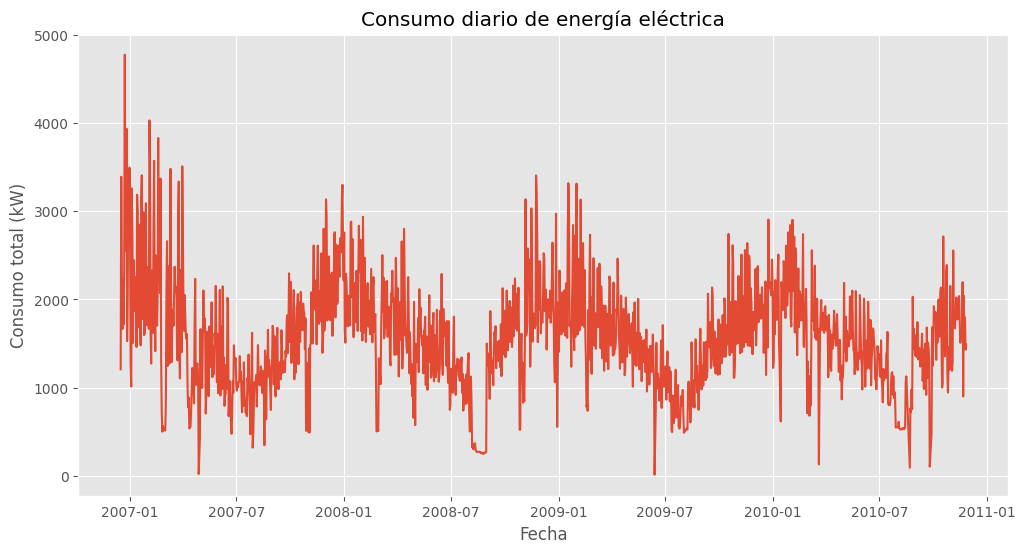

In [223]:
#Graficamos el consumo diario de energía eléctrica
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values)
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.grid(True)
plt.show()

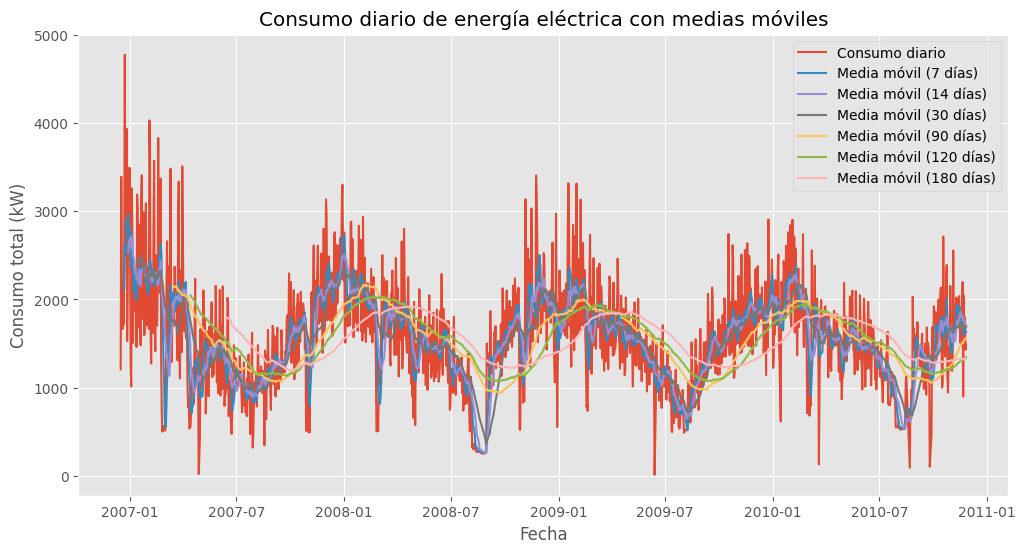

In [226]:
# Calculamos la media móvil con diferentes ventanas
window_sizes = [7, 14, 30, 90, 120, 180]  # Definimos diferentes tamaños de ventana para la media móvil
rolling_means = {}

for window_size in window_sizes:
    rolling_means[window_size] = daily_data.rolling(window=window_size).mean()

# Visualizar las medias móviles
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')

for window_size, rolling_mean in rolling_means.items():
    plt.plot(daily_data.index, rolling_mean.values, label=f'Media móvil ({window_size} días)')

plt.title('Consumo diario de energía eléctrica con medias móviles')
plt.xlabel('Fecha')
plt.ylabel('Consumo total (kW)')
plt.legend()
plt.grid(True)
plt.show()

In [236]:
from logging import root
# selecciona la mejor media movil menor a 90 respecto al error cuadratico
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Calcular el error cuadrático medio para cada media móvil
errors = {}
for window_size, rolling_mean in rolling_means.items():
  if window_size < 180:
    # Asegurarse de que los datos tengan el mismo tamaño
    valid_indices = rolling_mean.notna()
    rmse = root_mean_squared_error(daily_data[valid_indices], rolling_mean[valid_indices])
    #rmse = mean_squared_error(daily_data[valid_indices], rolling_mean[valid_indices], squared=False)
    errors[window_size] = rmse

# Encontrar la media móvil con el menor error
best_window_size = min(errors, key=errors.get)
print(f"La mejor media móvil (menor a 180 días) con respecto al error cuadrático es de {best_window_size} días.")

La mejor media móvil (menor a 180 días) con respecto al error cuadrático es de 7 días.


In [237]:
# Hacer media móvil para n = 7
n = 7
k = len(daily_data.values)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0
for i in range(n-1,k):
  mmovil[i] = np.sum(daily_data.values[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan,           nan, ..., 1676.54114286,
       1644.97142857, 1633.21485714])

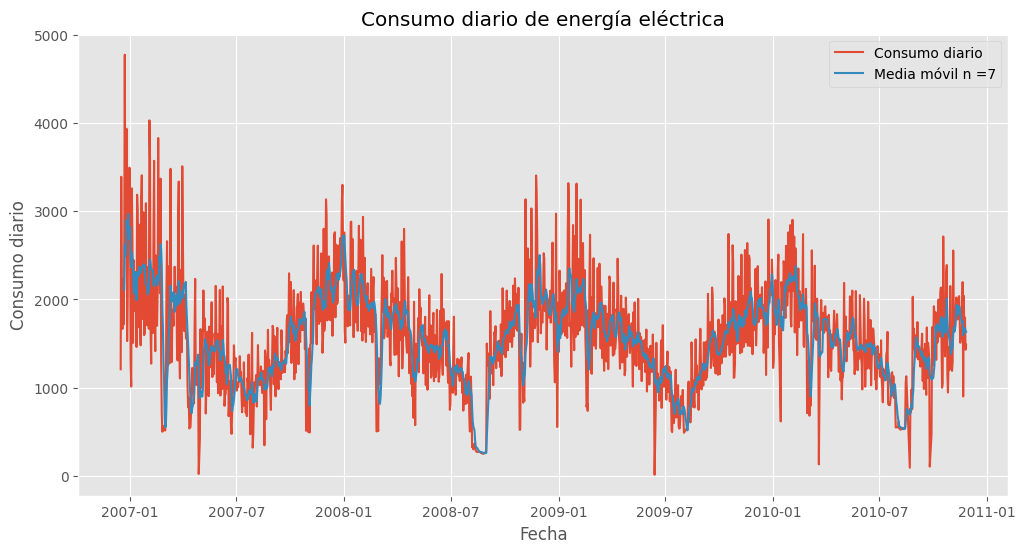

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, label='Consumo diario')
plt.plot(daily_data.index, mmovil, label='Media móvil n =7')
plt.title('Consumo diario de energía eléctrica')
plt.xlabel('Fecha')
plt.ylabel('Consumo diario')
plt.legend()
plt.grid(True)
plt.show()

In [242]:
# Estacionalidad
power = daily_data.values
est = power - mmovil
est

array([          nan,           nan,           nan, ...,  119.70685714,
       -213.80742857, -145.11085714])

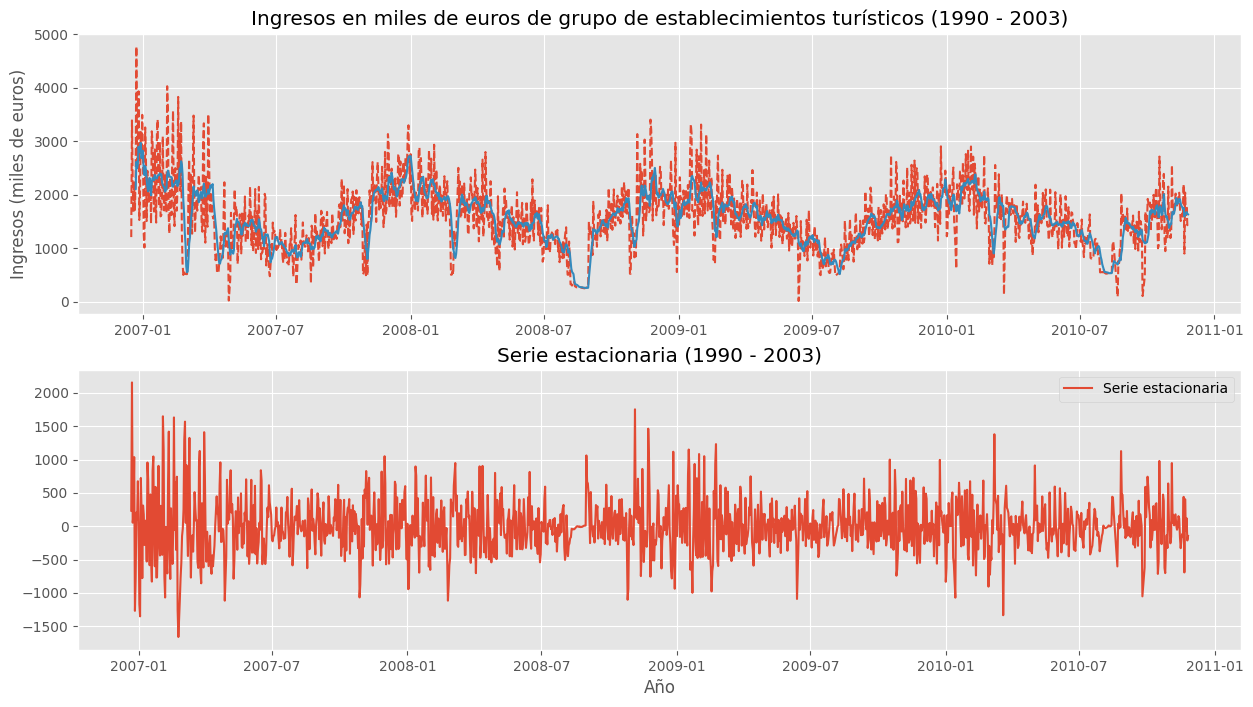

In [243]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(daily_data.index,power, '--', label='Ingresos')
plt.plot(daily_data.index,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(daily_data.index,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

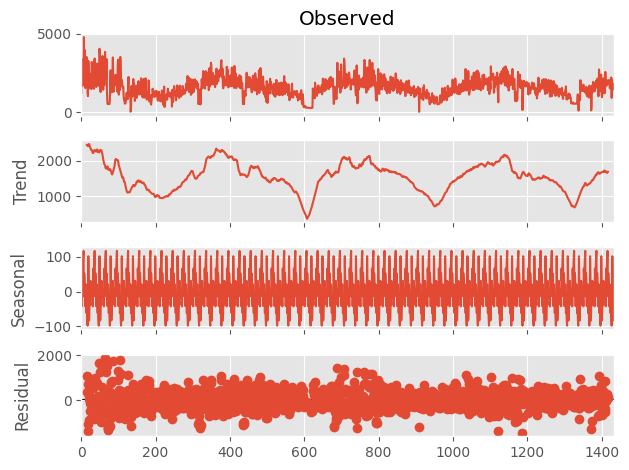

In [245]:
#Realizamos y graficamos la descomposición de la serie de tiempo
import statsmodels.api as sm

# Replace 'freq' with 'period'
descomposicion = sm.tsa.seasonal_decompose(daily_data.values, model='additive', period=30)
descomposicion.plot();

In [246]:
# convertir daily_data en data frame

# Convertir daily_data a DataFrame
df_daily_data = pd.DataFrame({'Date': daily_data.index, 'Global_active_power': daily_data.values})
print(df_daily_data.head())

         Date  Global_active_power
0  2006-12-16             1209.176
1  2006-12-17             3390.460
2  2006-12-18             2203.826
3  2006-12-19             1666.194
4  2006-12-20             2225.748


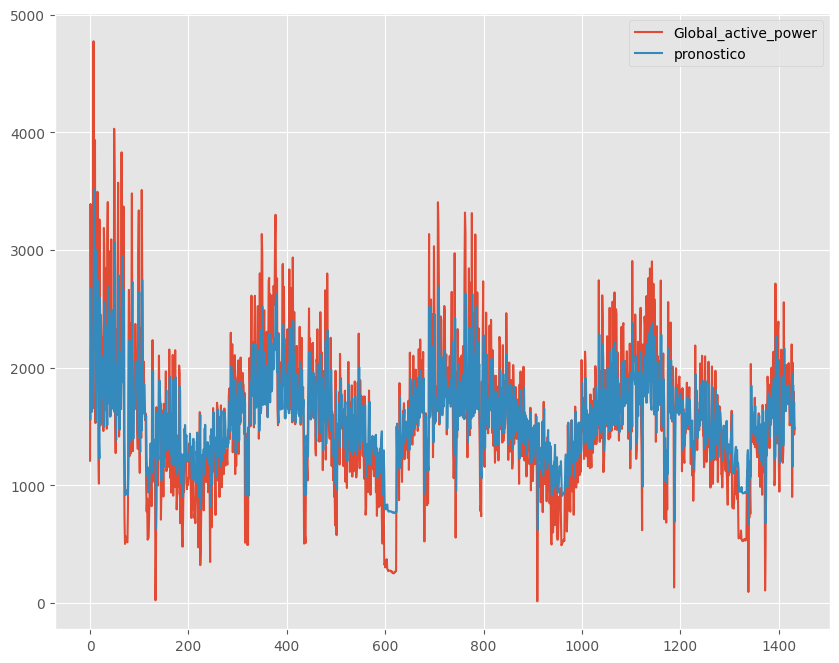

In [247]:
#Realizamos el pronóstico con el modelo Arima
from statsmodels.tsa.arima.model import ARIMA
modelo = ARIMA(df_daily_data['Global_active_power'].iloc[1:], order=(1,0,0))
resultados = modelo.fit()
df_daily_data['pronostico'] = resultados.fittedvalues
plot = df_daily_data[['Global_active_power', 'pronostico']].plot(figsize=(10, 8));

In [250]:
# Calculamos el rmse para el modelo arima
df_daily_data.dropna(inplace=True)
rmse_arima = root_mean_squared_error(
    df_daily_data['Global_active_power'], df_daily_data['pronostico']
)
print(f"El error cuadrático medio del modelo ARIMA es: {rmse_arima}")

El error cuadrático medio del modelo ARIMA es: 483.17259500729364


In [302]:
# Revisamos estadísticas claves de consumo de energía
mean_consumption = df['Global_active_power'].mean()  # Media
std_consumption = df['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption:.3f} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption:.3f} kW")

Media del consumo de energía: 1.092 kW
Desviación estándar del consumo de energía: 1.057 kW


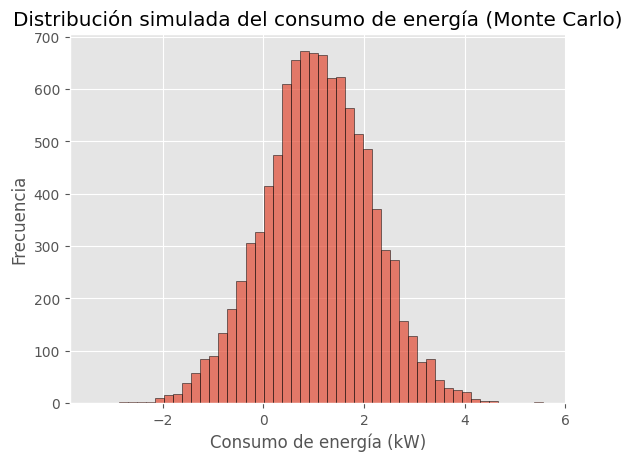

In [309]:
# Definir la simulación Monte Carlo
# Vamos a simular 10000 escenarios de consumo de energía futura
num_simulations = 10000
# Simulamos escenarios de consumo basado en una distribución normal
simulated_consumption = np.random.normal(loc=mean_consumption, scale=std_consumption, size=num_simulations)

# Visualizar los resultados
plt.hist(simulated_consumption, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribución simulada del consumo de energía (Monte Carlo)')
plt.xlabel('Consumo de energía (kW)')
plt.ylabel('Frecuencia')
plt.show()

In [344]:
simulated_consumption
df_simulated_consumption = pd.DataFrame(simulated_consumption)
df_simulated_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [347]:
# dataset con los datos simulados, convierte en dataset y coloca fechas, Empezar desde el día siguiente al último del dataset original

# Find the last date in the original dataset
last_date = df['Date'].max()

# Create a list of dates starting from the day after the last date
dates = [last_date + timedelta(days=i) for i in range(1, len(simulated_consumption) + 1)]

# Create a DataFrame with the simulated data and dates
df_simulated = pd.DataFrame({'Date': dates, 'Global_active_power': simulated_consumption})
df_simulated = df_simulated.head(len(df_daily_data))
df_simulated = df_simulated.set_index('Date')
#print(df_simulated)

In [353]:
import plotly.express as px

# Assuming df_daily_data is already defined as in your provided code
fig = px.line(df_simulated, x=df_simulated.index, y='Global_active_power', title='Consumo diario de energía eléctrica')
fig.show()

In [349]:
# Revisamos estadísticas claves de consumo de energía
mean_consumption_MC = df_simulated['Global_active_power'].mean()  # Media
std_consumption_MC = df_simulated['Global_active_power'].std()    # Desviación estándar
print(f"Media del consumo de energía: {mean_consumption_MC:.3f} kW")
print(f"Desviación estándar del consumo de energía: {std_consumption_MC:.3f} kW")

Media del consumo de energía: 1.097 kW
Desviación estándar del consumo de energía: 1.060 kW


¿Los datos simulados realizaron alguna contribución?
Si, ya que nos muestra que el consumo se mantendrá alrededor de 1KW en un rango entre +4.7Kw y -2.8KW